In [9]:
import json, os

def maybe_download(path, url):
    if not os.path.exists(path):
        import urllib
        urllib.urlretrieve(url, path)
    with open(path, 'r') as data:
        geojson = json.loads(data.read())
    return geojson

In [12]:
from jupyter_map_gl import GlMap
from IPython.display import display

url = 'https://raw.githubusercontent.com/chelm/geodata/master/2015-tornadoes.json'
geojson = maybe_download('./2015-tornados.json', url)

layer_props = {
    'dotRadius': 4,
    'globalOpacity': 1,
    'compositeOperation': 'screen',
    'dotFill': '#0FBA0F'
}

m = GlMap(props={'width':1000, 
                 'height': 500,
                 'latitude': 39.9,
                 'longitude': -99,
                 'geojson': geojson,
                 'layerProps': layer_props,
                 'mapboxApiAccessToken': ""
                })

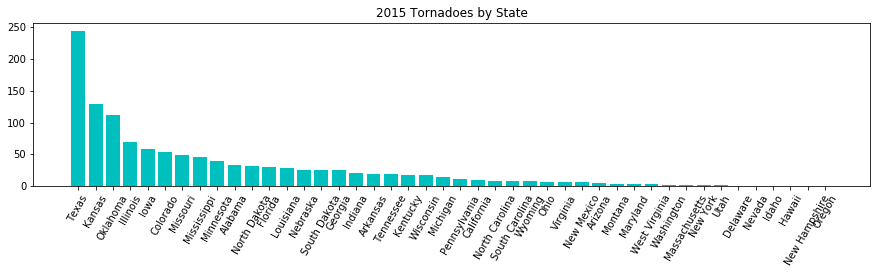

In [13]:
# Visualize tornadoes by state

from collections import Counter
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from dateutil import parser

states_group = Counter([f['properties']['State1'] for f in geojson['features']]).items()
states = zip(*list(reversed(sorted(states_group, key=lambda tup: tup[1]))))

fig, ax = plt.subplots(1, figsize=(15,3))
plt.xticks(range(len(states[0])), states[0], rotation=60)
ax.set_title('2015 Tornadoes by State')
ax.bar(range(len(states[0])), states[1], color='c', lw=.5)
plt.show()